# RESUMO PARA P1

## CRISP-DM Businees Understanding
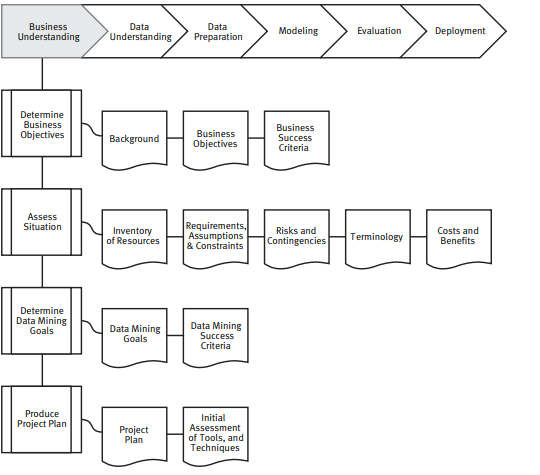

In [ ]:
##

# **Seleção e Organização de Dados com Pandas**
---
Nesta aula vamos aprender:
- Introdução ao `Pandas`
- Estrutura dos `Pandas`
- Acesso de arquivos no Colab e Inspeção inicial dos dados
<br>

<small><b>(\*) Este material pode ser o material empregado para mais de uma aula de `Pandas`


👉[Pandas_Cheat_Sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)

Aqui você vai aprender como empregar o pacote Pandas do `Python` para adquirir dados, selecionar dados de interesse e fazer transformações úteis sobre os dados.

O `Pandas` é uma biblioteca para manipulação e análise de dados orientada a colunas. Ele organiza os dados em formato de tabelas, semelhante ao que você encontra em bancos de dados relacionais ou mesmo em sistemas de planilhas. Sobre essas estruturas e ele fornece uma série de operações que tornam ele o principal pacote para manipulação de dados em Python. Outros pacotes de manipulação de dados, como o `Dask` e o `PySpark`, incorporam outros recursos como parelelismo para lidar com grandes conjuntos de dados mas guardam grande semelhança com o Pandas em termos de programação. Além disso o Pandas fornece acesso a inúmeros formatos de dados, de planilhas a bancos de dados NoSQL, e  desse modo, conhecendo o Pandas você será capaz de manipular quaisquer dados em `Python`.

O `Pandas` é um projeto de código aberto desenvolvido inicialmente por Wes McKinney a partir de 2008 que empregoou como base para seu desenvolvimento as estruturas de dataframes já presentes na linguagem R.


# Pandas

O `Pandas` é um pacote `Python`, desenvolvido sobre `NumPy`, para manipulação e análise de dados orientada a colunas. Ele organiza os dados em dois tipos de estruturas, Séries e `DataFrames` e opera seleções e transformações sobre essas coleções de dados.

* **`DataFrame`**: você pode imaginar como uma tabela de dados relacionais, com linhas e colunas nomeadas, como no Excel ou em SQL.
* **`Series`**: é uma única coluna de dados, e o `DataFrame` contém um ou mais `Series` com um nome para cada uma delas.

O `DataFrame`, implementado em `Python`, é uma abstração comumente usada para manipulação de dados que tem origem na linguagem R, mas você encontrará implementações similares também em outras linguagens.


## Import da biblioteca

In [ ]:
import pandas as pd
import numpy as np

## Criando um `pd.Series` e um `pd.DataFrame`

Uma `pd.Series` pode ser criada a partir de uma lista e um `pd.Dataframe` pode ser criado empregando-se uma estrutura de dicionário.

In [ ]:
# Séries
student_names = pd.Series(['Adriana', 'Carol', 'Daniel'])
age = pd.Series([18, 19, 19])

# DataFrame
students = pd.DataFrame({ 'Student Name': student_names, 'Age': age })
students


,Student Name,Age
0,Adriana,18
1,Carol,19
2,Daniel,19


## Lendo um `DataFrame`

O uso mais comum do `Pandas` que faremos é para o acesso a arquivos e bases de dados e o `Pandas` permite ler e gravar dados de diferetes fontes como arquivos `.csv, .json, .xlsx` e arquivos de bancos de dados `sql`, Mongo etc.


| Format        | Read           | Save          |
| ------------- |:--------------:| ----------------:|
| csv           | `pd.read_csv()`  |`df.to_csv()`     |
| json          | `pd.read_json()` |`df.to_json()`    |
| xlsx          | `pd.read_excel()`|`df.to_excel()`   |
| hdf           | `pd.read_hdf()`  |`df.to_hdf()`     |
| sql           | `pd.read_sql()`  |`df.to_sql()`     |

que podem ser acessados local ou pela internet.


In [ ]:
tips = pd.read_csv('https://raw.githubusercontent.com/Rogerio-mack/Visualizacao-de-Dados-em-Python/main/data/tips.csv')
tips.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


O comando `df.head()` permite exibir o aspecto inicial dos dados a partir de suas primeiras linhas.


## Upload de arquivos de seu sistema de arquivos local

Se você estiver empregando o Google Colab e quiser acessar arquivos locais da sua máquina você pode *arrastar* os arquivos para o diretório da máquina virtual ou empregar uma API para acesso aos arquivos locais da sua máquina. `files.upload` retorna um dicionário dos arquivos que foram carregados. O dicionário é codificado pelo nome do arquivo e os valores são os dados que foram carregados.

Essas instruções encontram-se comentadas abaixo.

In [ ]:
# from google.colab import files

# uploaded = files.upload()

# for fn in uploaded.keys():
#   print('User uploaded file "{name}" with length {length} bytes'.format(
#       name=fn, length=len(uploaded[fn])))

## Explorando a estrutura básica dos dados

Antes de explorarmos o conteúdo dos dados é útil termos algumas informações sobre a estrutura dos dados que estamos lidando como os valores que assumem os dados, quantas linhas temos em uma tabela, o número de atributos, o tipo de dados etc.

In [ ]:
tips.shape # nr de linhas e colunas

(244, 7)

In [ ]:
len(tips) # número de linhas

244

In [ ]:
tips.columns.to_list() # ou tips.columns

['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size']

In [ ]:
tips.dtypes # tipo dos atributos

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

O comando `describe()` exibe informações estatísticas sumarizadas dos dados.

In [ ]:
tips.describe(include='all')

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


# Selecionando Dados

Seleções dos dados são bastante importantes. Você nem sempre estará interessado em exibir ou analisar todos os dados. Por exemplo, você pode ter dados de produção de várias unidades de uma fábrica, mas estar interessado somente em dados das unidades de São Paulo (seleção de linhas ou casos). Ou, você pode ter dados de vendas com diversas informações dos produtos (cor, modelo etc.) e dos clientes (nome, CPF etc.) e querer apenas dados de peso e dimensões do produto, e da origem e destino da compra para analisar os preços de frete (seleção de colunas ou atributos). Mais frequentemente ainda você vai realizar as duas seleções criando *slices* dos dados.



## Seleção de Colunas, Seleção de Linhas e de Linhas e Colunas

<img src="https://pandas.pydata.org/docs/_images/03_subset_columns.svg" width=320, align="center">
<img src="https://pandas.pydata.org/docs/_images/03_subset_rows.svg" width=320, align="center">
<img src="https://pandas.pydata.org/docs/_images/03_subset_columns_rows.svg" width=320, align="center">



## Selecionando colunas de dados como `pd.Series`

Como vimos, as colunas de um `DataFrame` são séries do `Pandas` e podemos selecionar e operar com cada uma das séries de um `DataFrame`. Existem dois modos de seleção

```
df.<nome do atributo>

df['<nome do atributo>']
```

eles retornam o mesmo resultado e a segunda forma é sempre necessária quando temos nomes de atributos com espaços ou caracteres especiais.


In [ ]:
print(tips.tip)
# ou
# print(tips['tip'])

0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 244, dtype: float64


Esse conjunto de dados é um `pd.Series` e podemos fazer uma série de operações sobre essa coleção de dados, como calcular a soma ou a média de valores.

In [ ]:
tip_series = tips['tip']
print(f'Média das gorjetas: USD {tip_series.mean() :.2f} e Total das gorjetas: USD {tip_series.sum() :.2f}')

Média das gorjetas: USD 3.00 e Total das gorjetas: USD 731.58


Pode ser útil também você transformar uma `pd.Series` em uma lista `Python` para que você possa realizar as operações de listas que você já conhece.

In [ ]:
dias = tips.day
dias = dias.to_list()
dias.count('Sat')

87

## Selecionando uma ou Mais Colunas como `pd.DataFrame`

<img src="https://pandas.pydata.org/docs/_images/03_subset_columns.svg" width=320, align="center">

Mas você pode estar interessado na seleção de *mais que uma coluna* de dados. Para isso você pode simplesmente informar para o `Pandas` uma **lista de atributos** a serem selecionados.

```

df [ [ <lista-de-colunas> ] ]

```

Diferentemente da seleção anterior que retorna um Série do `Pandas`, a seleção desse modo, com uma ou mais colunas informadas em uma lista, retorna um `DataFrame`.



A seleção como `DataFrame` permite a seleção de várias séries de dados (atributos) para construírmos subconjuntos de dados de interesse. Essas seleções de dados também são `DataFrame` e todas as operações de `DataFrame` são aplicáveis.

In [ ]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [ ]:
selected_tips = tips[['total_bill', 'tip', 'size']]

selected_tips.head() # um novo dataframe com atributos selecionados

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4


> $\bigstar \text{  }$ *A seleção com uma ou mais colunas informadas em uma lista, retorna um `DataFrame`. Note que `df['tip']` retorna um `pd.Series`, enquanto, selecionar `df[['tip']]` retorna um `pd.DataFrame` de uma única coluna.*



De modo geral, você pode empreguar a seleção de `pd.Series` para selecionar um único atributo, e empregar a seleção `pd.DataFrame` quando estiver interessado na criação de subconjuntos de dados.

## Selecionando Maiores e Menores

Veremos mais adiante como fazer seleção de linhas, mas aqui é oportuno vermos como selecionar linhas que contenham os maiores e os menores valores da coleção.

In [ ]:
tips.nsmallest(5,'total_bill')

,total_bill,tip,sex,smoker,day,time,size
67,3.07,1.00,Female,Yes,Sat,Dinner,1
92,5.75,1.00,Female,Yes,Fri,Dinner,2
111,7.25,1.00,Female,No,Sat,Dinner,1
172,7.25,5.15,Male,Yes,Sun,Dinner,2
149,7.51,2.00,Male,No,Thur,Lunch,2


In [ ]:
tips_top3 = tips.nlargest(3,'total_bill')
tips_top3

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.00,Male,Yes,Sat,Dinner,3
212,48.33,9.00,Male,No,Sat,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4


## Alterando e Incluindo Colunas de Dados

Muitas vezes é necessário você criar atributos derivados a partir dos dados originais, como converter os valores para R\$ , criar um atributo com o valor das contas descontado a gorjeta ou o valor da conta divido pelos participantes da mesa. Essa é uma grande facilidade do `Pandas` que, a exemplo do `NumPy`,  permite fazer essas operações com um único comando sobre toda uma coleção de dados sem a necessidade de laços de programa.

In [ ]:
dolar_real_rate = 5.8
tips['total_bill'] = tips['total_bill'] * dolar_real_rate         # alterando
tips['tip'] = tips['tip'] * dolar_real_rate                       # alterando

tips['total_bill_minus_tips'] = tips['total_bill'] - tips['tip']    # incluindo um novo atributo
tips['bill_by_head'] = tips['total_bill'] / tips['size']            # incluindo um novo atributo
tips.head()

,total_bill,tip,sex,smoker,day,time,size,total_bill_minus_tips,bill_by_head
0,98.542,5.858,Female,No,Sun,Dinner,2,92.684,49.271000
1,59.972,9.628,Male,No,Sun,Dinner,3,50.344,19.990667
2,121.858,20.300,Male,No,Sun,Dinner,3,101.558,40.619333
3,137.344,19.198,Male,No,Sun,Dinner,2,118.146,68.672000
4,142.622,20.938,Female,No,Sun,Dinner,4,121.684,35.655500


## Selecionar Linhas

<img src="https://pandas.pydata.org/docs/_images/03_subset_rows.svg" width=320, align="center">

A seleção de linhas é mais interessante por que podemos especificar condições para os valores que buscamos. Por exemplo, você pode selecionar o tipo de peças que deseja ver em um `DataFrame` com dados de vários componentes, ou selecionar a as unidades de fábrica de uma certa cidade que você tem os dados de produção.

O critério de seleção é um predicado lógico e você deve empregar a seguinte sintaxe:

```
df [ <critério de seleção> ]
```

Exemplos

```
df [ nome_coluna == valor ]
df [ nome_coluna != valor ]
df [ nome_coluna > valor ]
```

Assim, podemos selecionar os dados somente dos não fumantes ou não fumantes:

In [ ]:
tips_nao_fumantes = tips[ tips.smoker == 'No' ]
tips_fumantes = tips[ tips.smoker == 'Yes' ]

E podemos com isso já responder algumas questões interessantes que envolvem a proporção dos dados de fumantes e não fumantes.

In [ ]:
print(f'Percentual de Clientes Fumantes {len( tips_fumantes ) / len( tips ) :.2f} %')

Percentual de Clientes Fumantes 0.38 %


## Seleção de Linhas e Colunas

<img src="https://pandas.pydata.org/docs/_images/03_subset_columns_rows.svg" width=320, align="center">

O uso mais geral das seleções é quando fazemos seleções de linhas e colunas dos dados, e às vezes nos referimos a esse subconjunto dos dados de *slice* (fatia) dos dados.

A boa prática indica que sempre faremos primeiro a seleção das linhas,

```
df [ <critério de seleção> ] ...

...Selecionando uma coluna
df [ <critério de seleção> ].nome_coluna                  pd.Series
df [ <critério de seleção> ]['nome_coluna']

...Selecionando uma ou mais colunas
df [ <critério de seleção> ][ [<lista-de-colunas>] ]      pd.DataFrame

```


Com isso podemos fazer inúmeras seleções de dados que temos interesse em visualizar ou analisar, e responder a muitas perguntas sobre os dados.

Fumantes ou Mulheres, pagam mais gorjeta (em média) ?

In [ ]:
tips[ tips.smoker == 'Yes' ]['tip'].mean() > tips[ tips.smoker == 'No' ]['tip'].mean()

True

In [ ]:
tips[ tips.sex == 'Female' ]['tip'].mean() > tips[ tips.sex == 'Male' ]['tip'].mean()

False

As selecões de subconjuntos de dados, com veremos, tem uma papel importante na construção de visualizações e entendimento dos dados pois, muitas vezes, estamos interessados em comparar diferentes classes ou subconjuntos dados, como no exemplo abaixo em que observamos os valores das gorjetas de homens e mulheres.

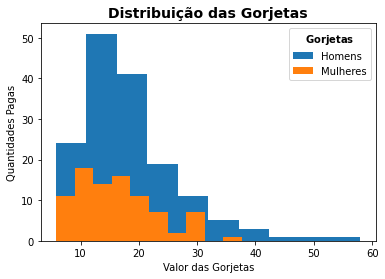

In [ ]:
import matplotlib.pyplot as plt
plt.hist(tips[ tips.sex == 'Male' ]['tip'], label='Homens')
plt.hist(tips[ tips.sex == 'Female' ]['tip'], label='Mulheres')

plt.xlabel('Valor das Gorjetas')
plt.ylabel('Quantidades Pagas')
plt.title('Distribuição das Gorjetas', fontsize=14, weight='bold')
plt.legend(title='$\\bf{Gorjetas}$')
plt.show()

O `Pandas` ainda conta com uma série de operações para manipulação e transformação dos dados como funções de joins e merge de tabelas, groupby etc. empregaremos eventualmente essas operações ao longo do texto e para maiores detalhes você poderá consultar a documentação do `Pandas` ou outras referências online.

# Agregações de dados

Muitas vezes estamos interessados e aplicar uma função ou obter uma estatística dos dados para diferentes *classes* ou grupos de dados simultaneamente. O `Pandas` oferece uma operação de `groupby`, que permite manipular e resumir conjuntos de dados dessa forma.

Você já aprendeu que pode aplicar operações como média e máximo para sumarizar estatísticas, por exemplo de uma `Serie` de dados contendo a idade em um `DataFrame` de cliente ou o preço do metro quadrado em um `DataFrame`de Imóveis.

<img src="https://pandas.pydata.org/docs/_images/06_aggregate.svg" width=320, align="center">

Mas como podemos obter as médias de idade por sexo ou o preço máximo do m2 dos imóveis por região?

<img src="https://pandas.pydata.org/docs/_images/06_reduction.svg" width=320, align="center">

O `groupby` é a função que permite agregar esses dados e obter estatísticas ou aplicar funções a várias classes ou grupos de dados.



Se você está familiarizado com SQL ou o Excel, o resultado do `groupby` em `Pandas` é bastante semelhante ao que você obtém com o `groupby` do SQL e as tabelas dinâmicas do Excel.

## Funcionamento do GroupBy

A operação de `groupby` consiste em geral de 3 etapas:

1. Divisão dividir e agrupar dos dados  dependendo de um valor de chave especificada.
2. Aplicar uma computação, em geralmente uma estatística agregada como média, *count* ou max, uma transformação ou filtragem para os grupos individuais.
3. Combinar os resultados dessas operações em uma saída única.

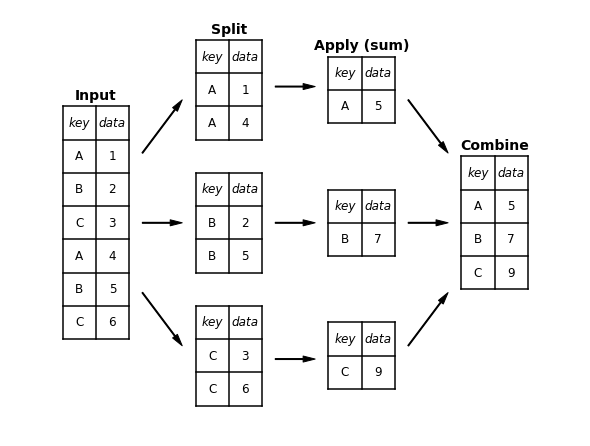

In [ ]:
# source: https://jakevdp.github.io/PythonDataScienceHandbook/
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def draw_dataframe(df, loc=None, width=None, ax=None, linestyle=None,
                   textstyle=None):
    loc = loc or [0, 0]
    width = width or 1

    x, y = loc

    if ax is None:
        ax = plt.gca()

    ncols = len(df.columns) + 1
    nrows = len(df.index) + 1

    dx = dy = width / ncols

    if linestyle is None:
        linestyle = {'color':'black'}

    if textstyle is None:
        textstyle = {'size': 12}

    textstyle.update({'ha':'center', 'va':'center'})

    # draw vertical lines
    for i in range(ncols + 1):
        plt.plot(2 * [x + i * dx], [y, y + dy * nrows], **linestyle)

    # draw horizontal lines
    for i in range(nrows + 1):
        plt.plot([x, x + dx * ncols], 2 * [y + i * dy], **linestyle)

    # Create index labels
    for i in range(nrows - 1):
        plt.text(x + 0.5 * dx, y + (i + 0.5) * dy,
                 str(df.index[::-1][i]), **textstyle)

    # Create column labels
    for i in range(ncols - 1):
        plt.text(x + (i + 1.5) * dx, y + (nrows - 0.5) * dy,
                 str(df.columns[i]), style='italic', **textstyle)

    # Add index label
    if df.index.name:
        plt.text(x + 0.5 * dx, y + (nrows - 0.5) * dy,
                 str(df.index.name), style='italic', **textstyle)

    # Insert data
    for i in range(nrows - 1):
        for j in range(ncols - 1):
            plt.text(x + (j + 1.5) * dx,
                     y + (i + 0.5) * dy,
                     str(df.values[::-1][i, j]), **textstyle)


#----------------------------------------------------------
# Draw figure

import pandas as pd
df = pd.DataFrame({'data': [1, 2, 3, 4, 5, 6]},
                   index=['A', 'B', 'C', 'A', 'B', 'C'])
df.index.name = 'key'


fig = plt.figure(figsize=(8, 6), facecolor='white')
ax = plt.axes([0, 0, 1, 1])

ax.axis('off')

draw_dataframe(df, [0, 0])

for y, ind in zip([3, 1, -1], 'ABC'):
    split = df[df.index == ind]
    draw_dataframe(split, [2, y])

    sum = pd.DataFrame(split.sum()).T
    sum.index = [ind]
    sum.index.name = 'key'
    sum.columns = ['data']
    draw_dataframe(sum, [4, y + 0.25])

result = df.groupby(df.index).sum()
draw_dataframe(result, [6, 0.75])

style = dict(fontsize=14, ha='center', weight='bold')
plt.text(0.5, 3.6, "Input", **style)
plt.text(2.5, 4.6, "Split", **style)
plt.text(4.5, 4.35, "Apply (sum)", **style)
plt.text(6.5, 2.85, "Combine", **style)

arrowprops = dict(facecolor='black', width=1, headwidth=6)
plt.annotate('', (1.8, 3.6), (1.2, 2.8), arrowprops=arrowprops)
plt.annotate('', (1.8, 1.75), (1.2, 1.75), arrowprops=arrowprops)
plt.annotate('', (1.8, -0.1), (1.2, 0.7), arrowprops=arrowprops)

plt.annotate('', (3.8, 3.8), (3.2, 3.8), arrowprops=arrowprops)
plt.annotate('', (3.8, 1.75), (3.2, 1.75), arrowprops=arrowprops)
plt.annotate('', (3.8, -0.3), (3.2, -0.3), arrowprops=arrowprops)

plt.annotate('', (5.8, 2.8), (5.2, 3.6), arrowprops=arrowprops)
plt.annotate('', (5.8, 1.75), (5.2, 1.75), arrowprops=arrowprops)
plt.annotate('', (5.8, 0.7), (5.2, -0.1), arrowprops=arrowprops)

plt.axis('equal')
plt.ylim(-1.5, 5);

fig.savefig('03.08-split-apply-combine.png')

No exemplo acima,

1. Dividimos os dados nas classes A, B e C
2. Em seguida aplicamos a cada grupo uma função de agregação sobre o valor. No caso aplicamos a `sum()`, mas poderíamos aplicar outras funções de agregação como `count()`, `mean()`, `std()` etc.
3. Combinamos então esses dados em uma única saída.

Em uma única linha, todas as operação são executadas pela função `groupby()`,


In [ ]:
df.groupby(df.index).sum()

,data
key,
A,5
B,7
C,9


Aqui é empregado o índice do `DataFrame`. Não daremos muita atenção aqui nesta introdução ao `Pandas` ao uso de índices. Eles tem um papel mais importante no desempenho de algumas operações sobre os dados mas, para os nossos propósitos, é suficiente entendermos os índices como mais um atributo dos dados e que podemos referenciar como `df.index`.

Outras operações de agregação além do `sum()` podem ser então igualmente aplicadas a quaisquer atributos desde que façam sentido para os seus valores (posso ter o valor máximo de um atributo do tipo String, mas não um valor de média).

In [ ]:
display( df.groupby(df.index).mean() )
display( df.groupby(df.index).std() )
display( df.groupby(df.index).min() )


,data
key,
A,2.5
B,3.5
C,4.5


,data
key,
A,2.12132
B,2.12132
C,2.12132


,data
key,
A,1
B,2
C,3


Ou ainda,

In [ ]:
display( df.groupby(df.index).agg(['mean', 'std', 'min']) )

data             
    mean      std min
key                  
A    2.5  2.12132   1
B    3.5  2.12132   2
C    4.5  2.12132   3

Veja, por exemplo, a aplicação em um conjunto de dados mais prático.

In [ ]:
pedidos = pd.DataFrame( {'Pedido': pd.Series([ 1, 1, 1, 2, 2, 2, 2, 3, 3]),
                         'Itens': pd.Series([ 'Tênis Corrida', 'Tênis Caminhada', 'Camiseta', 'Tênis Caminhada', 'Camiseta', 'Boné' , 'Keds' ,'Tênis Caminhada', 'Camiseta' ]),
                         'Preco Unidade': pd.Series([ 300, 250, 90, 250, 90, 60, 250, 250, 90]),
                         'Quantidade': pd.Series([ 1, 2, 3, 2, 1, 1, 3, 2, 1]) } )
pedidos


,Pedido,Itens,Preco Unidade,Quantidade
0,1,Tênis Corrida,300,1
1,1,Tênis Caminhada,250,2
2,1,Camiseta,90,3
3,2,Tênis Caminhada,250,2
4,2,Camiseta,90,1
5,2,Boné,60,1
6,2,Keds,250,3
7,3,Tênis Caminhada,250,2
8,3,Camiseta,90,1


Aqui as operações são aplicáveis somente a valores numéricos,

In [ ]:
display( pedidos.groupby('Pedido').agg(['mean', 'std', 'min']) )

Preco Unidade                 Quantidade              
                mean         std min       mean       std min
Pedido                                                       
1         213.333333  109.696551  90       2.00  1.000000   1
2         162.500000  101.775898  60       1.75  0.957427   1
3         170.000000  113.137085  90       1.50  0.707107   1

Mas as funções, se aplicáveis, podem envolver também atributos categóricos,

In [ ]:
display( pedidos.groupby('Pedido').max() )

,Itens,Preco Unidade,Quantidade
Pedido,,,
1,Tênis Corrida,300,3
2,Tênis Caminhada,250,3
3,Tênis Caminhada,250,2


Podemos também selecionar os atributos,

In [ ]:
display( pedidos.groupby('Itens')['Quantidade'].agg(['mean', 'std', 'min', 'count']) )

# Experimente aqui, faz pouco sentido obter esses valores para Pedido
# display( pedidos.groupby('Itens').agg(['mean', 'std', 'min', 'count']) )

,mean,std,min,count
Itens,,,,
Boné,1.000000,NaN,1,1
Camiseta,1.666667,1.154701,1,3
Keds,3.000000,NaN,3,1
Tênis Caminhada,2.000000,0.000000,2,3
Tênis Corrida,1.000000,NaN,1,1


E, finalmente, as agregações também podem envolver mais que um nível de valores chave,


In [ ]:
display( pedidos.groupby( ['Itens','Pedido'] ).agg(['min','max']) )

Preco Unidade      Quantidade    
                                 min  max        min max
Itens           Pedido                                  
Boné            2                 60   60          1   1
Camiseta        1                 90   90          3   3
                2                 90   90          1   1
                3                 90   90          1   1
Keds            2                250  250          3   3
Tênis Caminhada 1                250  250          2   2
                2                250  250          2   2
                3                250  250          2   2
Tênis Corrida   1                300  300          1   1

## Acessando Chaves e Valores dos Grupos

O método `groupby` retorna um objeto do tipo `DataFrameGroupBy` e não um `DataFrame` e essa é uma grande diferença entre essa função no `Pandas` e no SQL. Os métodos de `DataFrame` não podem ser aplicados a um obejto do tipo `DataFrameGroupBy`, enquanto na SQL um SELECT com GROUPY no SQL retorna uma tabela e todas as operações de tabela são aplicáveis.

In [ ]:
pedidos.groupby('Itens')

A estrutura desses dados é basicamente na forma de um dicionário e você pode acessar as chaves e os seus valores.

In [ ]:
grupos_itens = pedidos.groupby('Itens')
print ( grupos_itens )
print ( grupos_itens.groups )
print ( grupos_itens.groups.keys() )
print ( grupos_itens.groups.values() )

{'Boné': [5], 'Camiseta': [2, 4, 8], 'Keds': [6], 'Tênis Caminhada': [1, 3, 7], 'Tênis Corrida': [0]}
dict_keys(['Boné', 'Camiseta', 'Keds', 'Tênis Caminhada', 'Tênis Corrida'])
dict_values([Int64Index([5], dtype='int64'), Int64Index([2, 4, 8], dtype='int64'), Int64Index([6], dtype='int64'), Int64Index([1, 3, 7], dtype='int64'), Int64Index([0], dtype='int64')])


### Iterando sobre grupos

Você pode, então, fazer iterações sobre esses valores ou aplicar funções de agregação,

In [ ]:
for chave in pedidos.groupby('Itens').groups.keys():
  print(chave)

# que é o mesmo que,
#
# for chave in grupos_itens.groups.keys():
#  print(chave)

for chave, grupo in pedidos.groupby('Itens'):
  print(chave)
  print(grupo)



Boné
Camiseta
Keds
Tênis Caminhada
Tênis Corrida
Boné
   Pedido Itens  Preco Unidade  Quantidade
5       2  Boné             60           1
Camiseta
   Pedido     Itens  Preco Unidade  Quantidade
2       1  Camiseta             90           3
4       2  Camiseta             90           1
8       3  Camiseta             90           1
Keds
   Pedido Itens  Preco Unidade  Quantidade
6       2  Keds            250           3
Tênis Caminhada
   Pedido            Itens  Preco Unidade  Quantidade
1       1  Tênis Caminhada            250           2
3       2  Tênis Caminhada            250           2
7       3  Tênis Caminhada            250           2
Tênis Corrida
   Pedido          Itens  Preco Unidade  Quantidade
0       1  Tênis Corrida            300           1


In [ ]:
pedidos.groupby('Itens').Quantidade.sum() # total de quantidades por item

# que é o mesmo que,
# grupos_itens.Quantidade.sum() # total de quantidades por item

Itens
Boné               1
Camiseta           5
Keds               3
Tênis Caminhada    6
Tênis Corrida      1
Name: Quantidade, dtype: int64

### Acessando os valores

Você pode referenciar diretamente o atributo em um grupo para obter uma `Serie` `Pandas` e, então, operar esses valores como abaixo,

In [ ]:
pedidos.groupby('Itens')[['Quantidade','Preco Unidade']].sum()

,Quantidade,Preco Unidade
Itens,,
Boné,1,60
Camiseta,5,270
Keds,3,250
Tênis Caminhada,6,750
Tênis Corrida,1,300


In [ ]:
pedidos.groupby('Itens')[['Quantidade','Preco Unidade']].sum()['Quantidade']

Itens
Boné               1
Camiseta           5
Keds               3
Tênis Caminhada    6
Tênis Corrida      1
Name: Quantidade, dtype: int64

In [ ]:
type( pedidos.groupby('Itens')[['Quantidade','Preco Unidade']].sum()['Quantidade'] )

pandas.core.series.Series

In [ ]:
pedidos.groupby('Itens')[['Quantidade','Preco Unidade']].sum()['Quantidade'].mean()

3.2

Mas um artíficio bastante prático que você pode empregar, se não estiver preocupado com o desempenho e uso de recursos de memória das operações, é transformar o seu agrupamento em um `DataFrame` para que você possa aplicar as operações que já conhece para essa classe diretamente,

In [ ]:
df = pd.DataFrame( pedidos.groupby('Itens')[['Quantidade','Preco Unidade']].sum() ).reset_index()
df.head()

,Itens,Quantidade,Preco Unidade
0,Boné,1,60
1,Camiseta,5,270
2,Keds,3,250
3,Tênis Caminhada,6,750
4,Tênis Corrida,1,300


# Combinações de Dados

Muitas vezes você pode estar lidando com mais de uma tabela ou conjunto de dados. Assim, operações para combinar esses dados são muito úteis.

Existem vários formas de combinar conjuntos de dados com Pandas. Aqui vamos nos concentrar nas operações de concatenação e de junções (joins) de dados.

O código abaixo tem apenas a finalidade de produzir as exibições de dados a seguir e você não precisa se preocupar com ele. Nos exemplos que seguem vamos empregar os `DataFrames` `df1`, `df2` e `df3` como abaixo.

In [ ]:
class display(object):
    # Adaptado de https://jakevdp.github.io/PythonDataScienceHandbook/index.html
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <hr>
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p><hr>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args

    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)

    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

In [ ]:
import pandas as pd

# Escola 1
df = pd.DataFrame({'Nome': ['Adriana', 'Daniel', 'Henrique'],
                   'Curso': ['Graduação','Graduação','Ensino Médio'],
                   'Idade': [34, 25, 17]})

# Escola 2
df2 = pd.DataFrame({'Nome': ['Beatriz', 'Anna'],
                   'Curso': ['Graduação', 'Ensino Médio'],
                   'Idade': [34, 17],
                   'Ingresso': [2018, 2020]})

# Preferências
df3 = pd.DataFrame({'Nome': ['Adriana', 'Daniel', 'Henrique', 'Beatriz', 'Anna'],
                   'Musica': ['Rock', 'MPB', 'HipHop', 'Jazz', 'Jazz']})

display('df', 'df2', 'df3')

df
       Nome         Curso  Idade
0   Adriana     Graduação     34
1    Daniel     Graduação     25
2  Henrique  Ensino Médio     17

df2
      Nome         Curso  Idade  Ingresso
0  Beatriz     Graduação     34      2018
1     Anna  Ensino Médio     17      2020

df3
       Nome  Musica
0   Adriana    Rock
1    Daniel     MPB
2  Henrique  HipHop
3   Beatriz    Jazz
4      Anna    Jazz

## Concatenação

Você pode concatenar tabelas de dados no sentido das linhas ou das colunas. O caso 'feliz' nessas operações é quando o número de colunas é o mesmo (concatenação  no sentido das linhas) ou quando o número de linhas é o mesmo (concatenação  no sentido das colunas).

### `pd.concat([df1,df2], axis=0)`, concatena linhas

In [ ]:
df4 = df2[['Nome','Curso','Idade']]

display('df', 'df4',
        "pd.concat([df,df4])")

,Nome,Curso,Idade
0,Adriana,Graduação,34
1,Daniel,Graduação,25
2,Henrique,Ensino Médio,17
,Nome,Curso,Idade
0,Beatriz,Graduação,34
1,Anna,Ensino Médio,17
,Nome,Curso,Idade
0,Adriana,Graduação,34
1,Daniel,Graduação,25
2,Henrique,Ensino Médio,17


### `pd.concat([df1,df2], axis=1)`, concatena colunas


In [ ]:
df5 = df3[['Musica']].head(3)

display('df', 'df5',
        "pd.concat([df,df5],axis=1)")



df
       Nome         Curso  Idade
0   Adriana     Graduação     34
1    Daniel     Graduação     25
2  Henrique  Ensino Médio     17

df5
   Musica
0    Rock
1     MPB
2  HipHop

pd.concat([df,df5],axis=1)
       Nome         Curso  Idade  Musica
0   Adriana     Graduação     34    Rock
1    Daniel     Graduação     25     MPB
2  Henrique  Ensino Médio     17  HipHop

No caso de não termos as quantidades de linhas ou colunas iguais conforme o sentido da combinação, os valores ausentes são preenchidos com NaN.

In [ ]:
display('df', 'df2',
        "pd.concat([df,df2])")

df
       Nome         Curso  Idade
0   Adriana     Graduação     34
1    Daniel     Graduação     25
2  Henrique  Ensino Médio     17

df2
      Nome         Curso  Idade  Ingresso
0  Beatriz     Graduação     34      2018
1     Anna  Ensino Médio     17      2020

pd.concat([df,df2])
       Nome         Curso  Idade  Ingresso
0   Adriana     Graduação     34       NaN
1    Daniel     Graduação     25       NaN
2  Henrique  Ensino Médio     17       NaN
0   Beatriz     Graduação     34    2018.0
1      Anna  Ensino Médio     17    2020.0

Essa operação, embora possa ser usada desse modo. Mas, a menos que os conjuntos de dados tenham índices únicos e distintos, pode gerar índices duplicados como você pode ver acima. Neste caso pode ser útil redefinir o índice como abaixo.

In [ ]:
display('df', 'df2',
        "pd.concat([df,df2]).reset_index(drop=True)")



df
       Nome         Curso  Idade
0   Adriana     Graduação     34
1    Daniel     Graduação     25
2  Henrique  Ensino Médio     17

df2
      Nome         Curso  Idade  Ingresso
0  Beatriz     Graduação     34      2018
1     Anna  Ensino Médio     17      2020

pd.concat([df,df2]).reset_index(drop=True)
       Nome         Curso  Idade  Ingresso
0   Adriana     Graduação     34       NaN
1    Daniel     Graduação     25       NaN
2  Henrique  Ensino Médio     17       NaN
3   Beatriz     Graduação     34    2018.0
4      Anna  Ensino Médio     17    2020.0

Problema semelhante pode ocorrer com a concatenação de colunas de dados quanto existem nomes de atributos (colunas) duplicados.

In [ ]:
display('df', 'df2',
        "pd.concat([df,df2],axis=1)")

df
       Nome         Curso  Idade
0   Adriana     Graduação     34
1    Daniel     Graduação     25
2  Henrique  Ensino Médio     17

df2
      Nome         Curso  Idade  Ingresso
0  Beatriz     Graduação     34      2018
1     Anna  Ensino Médio     17      2020

pd.concat([df,df2],axis=1)
       Nome         Curso  Idade     Nome         Curso  Idade  Ingresso
0   Adriana     Graduação     34  Beatriz     Graduação   34.0    2018.0
1    Daniel     Graduação     25     Anna  Ensino Médio   17.0    2020.0
2  Henrique  Ensino Médio     17      NaN           NaN    NaN       NaN

Com o mesmo nome os atributos não podem ser diferenciados e precisamos usar a *localização* dos atributos se quisermos recuperá-los (uma forma que não detalharemos aqui em detalhe).

In [ ]:
df3 = pd.concat([df,df2],axis=1)
df3['Nome']

,Nome,Nome
0,Adriana,Beatriz
1,Daniel,Anna
2,Henrique,NaN


In [ ]:
print(df3.loc[0][0])
print(df3.loc[0][3])

Adriana
Beatriz


A solução mais simples para isso é simplesmente fazer o rename das colunas após a operação. Isso pode ser feito do modo abaixo, ou você pode empregar o método `df.remane(columns=...)`.

In [ ]:
df3.columns = ['Nome', 'Curso', 'Idade', 'Nome2', 'Curso2', 'Idade2', 'Ingresso']
df3

,Nome,Curso,Idade,Nome2,Curso2,Idade2,Ingresso
0,Adriana,Graduação,34,Beatriz,Graduação,34.0,2018.0
1,Daniel,Graduação,25,Anna,Ensino Médio,17.0,2020.0
2,Henrique,Ensino Médio,17,NaN,NaN,NaN,NaN


O comando `concat` ainda pode ser empregado com o parâmetro `inneer`, `pd.concat([df1,df2], axis=0|1, join='inner')`, que concatena linhas ou colunas
mas garante que somente os elementos *inner* (mesmas colunas ou índices), dentro das duas tabelas participarão da concatenação. Não nos deteremos sobre esses comandos aqui, mas você pode experimentar a execução deles e ver os resultados obtidos. Mas atenção, não confunda essa operação com a junção de dados. Os Joins é o que veremos a seguir.

## Junções

As junções empregam um atributo *chave* para *match* ou junção dos dados e desempenham um papel muito importante na combinações de diferentes dados. Aqui as operações seguem o mesmo princípio dos joins da SQL e os seus resultados também são novos `DataFrames`, incluindo os conceitos *inner* e *outter* joins.

Temos 3 tipos de junções:

> * **Inner**, incluímos somente linhas com *match* das chaves nas duas tabelas
> * **Outter**, incluímos linhas independente do *match* das chaves nas duas tabelas
>> * **Left**, incluímos linhas com *match* das chaves nas duas tabelas + linhas da tabela à esquerda independente de match
>> * **Right**, incluímos linhas com *match* das chaves nas duas tabelas + linhas da tabela à direita independente de *match*



### `Inner Joins`

In [ ]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})
df3 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})
display('df1', 'df2', 'df3')

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR
,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014
,group,supervisor


No primeiro exemplo a junção é feita empregando o atributo `employee` para *match* dos dados. Os três comandos primeiros comandos abaixo produzem os mesmos resultados.

In [ ]:
df4 = pd.merge(df1, df2)
df4 = pd.merge(df1, df2, left_on='employee', right_on='employee')
df4 = pd.merge(df1, df2, on='employee')
display('df4')

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


Os demais exemplos apresentam várias formas de junções dos dados.

In [ ]:
display('df3', 'df4', 'pd.merge(df3, df4)')

df3
         group supervisor
0   Accounting      Carly
1  Engineering      Guido
2           HR      Steve

df4
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014

pd.merge(df3, df4)
         group supervisor employee  hire_date
0   Accounting      Carly      Bob       2008
1  Engineering      Guido     Jake       2012
2  Engineering      Guido     Lisa       2004
3           HR      Steve      Sue       2014

In [ ]:
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting',
                              'Engineering', 'Engineering', 'HR', 'HR'],
                    'skills': ['math', 'spreadsheets', 'coding', 'linux',
                               'spreadsheets', 'organization']})
display('df1', 'df5', "pd.merge(df1, df5)")

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR
,group,skills
0,Accounting,math
1,Accounting,spreadsheets
2,Engineering,coding
3,Engineering,linux
4,HR,spreadsheets


In [ ]:
df6 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'salary': [70000, 80000, 120000, 90000]})
pd.merge(df1, df6, left_on="employee", right_on="name").drop('name', axis=1)

,employee,group,salary
0,Bob,Accounting,70000
1,Jake,Engineering,80000
2,Lisa,Engineering,120000
3,Sue,HR,90000


### `Right` `Left` ` Joins`

`Right` e `Left` ` Joins` são empregados quando queremos adicionar à combinação dos dados elementos independentemente de fazerem *match* com as chaves de dados ou não.

In [ ]:
df7 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue', 'Adriana'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR', 'Commercial']})

df8 = pd.DataFrame({'group': ['Accounting', 'Accounting',
                              'Engineering', 'Engineering', 'HR', 'HR', 'Research'],
                    'skills': ['math', 'spreadsheets', 'coding', 'linux',
                               'spreadsheets', 'organization', 'Data Science']})


In [ ]:
display('df7','df8',
        'pd.merge(df7,df8)')

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR
4,Adriana,Commercial
,group,skills
0,Accounting,math
1,Accounting,spreadsheets
2,Engineering,coding
3,Engineering,linux


Na junção acima você não encontra a funcionária *Adriana* por que a chave (atributo *group*) *Commercial* só está presente na tabela à **esquerda** da junção. Para incluí-la, podemos fazer uma junção `Left`,

In [ ]:
display('df7','df8',
        "pd.merge(df7,df8,how='left')")

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR
4,Adriana,Commercial
,group,skills
0,Accounting,math
1,Accounting,spreadsheets
2,Engineering,coding
3,Engineering,linux


Do mesmo modo o skill *Data Science* não aparece na junção inicial por que a chave (atributo *group*) *Research* só está presente na tabela à **direita** da junção. Para incluí-la, podemos fazer uma junção `Right`,

In [ ]:
display('df7','df8',
        "pd.merge(df7,df8,how='right')")

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR
4,Adriana,Commercial
,group,skills
0,Accounting,math
1,Accounting,spreadsheets
2,Engineering,coding
3,Engineering,linux


Para inclusão de dados de ambas as tabelas podemos empregar o *full* outter joins das tabelas,

In [ ]:
display('df1','df5',
        "pd.merge(df1,df5,how='outer')")

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR
,group,skills
0,Accounting,math
1,Accounting,spreadsheets
2,Engineering,coding
3,Engineering,linux
4,HR,spreadsheets


# Reshape dos dados

Vamos concluir falando sobre operações de reshape, ou de alteração da forma dos dados.

Em muitos casos práticos os dados não estarão exatamente no melhor formato para sua análise. Podemos ter dados em colunas quanto queríamos que estivessem em linhas ou vice-versa. Empregamos então transformações para *reshape* dos dados. O `Pandas` fornece duas funções úteis para isso, o `melt` para levar dados de colunas para linhas e `pivot` para trazer dados de linhas para colunas.

## Melt, `pd.melt(df, id_vars = , value_vars = )`

Esta função incluirá para cada `id` uma nova variável com os valores do campo `value_vars`.

In [ ]:
display('df',
        "pd.melt(df, id_vars =['Nome'], value_vars =['Curso'])")


,Nome,Curso,Idade
0,Adriana,Graduação,34
1,Daniel,Graduação,25
2,Henrique,Ensino Médio,17
,Nome,variable,value
0,Adriana,Curso,Graduação
1,Daniel,Curso,Graduação
2,Henrique,Curso,Ensino Médio


In [ ]:
display('df',
        "pd.melt(df, id_vars =['Nome'], value_vars =['Curso','Idade'])")

,Nome,Curso,Idade
0,Adriana,Graduação,34
1,Daniel,Graduação,25
2,Henrique,Ensino Médio,17
,Nome,variable,value
0,Adriana,Curso,Graduação
1,Daniel,Curso,Graduação
2,Henrique,Curso,Ensino Médio
3,Adriana,Idade,34
4,Daniel,Idade,25
5,Henrique,Idade,17


Os parâmetros `var_name` e `value_name` podem ser empregados para alterar o nome dos atributos criados.

In [ ]:
display('df',
        "pd.melt(df, id_vars =['Nome'], value_vars =['Idade'], var_name ='Tipo_atributo', value_name ='Valor_atributo')")

,Nome,Curso,Idade
0,Adriana,Graduação,34
1,Daniel,Graduação,25
2,Henrique,Ensino Médio,17
,Nome,Tipo_atributo,Valor_atributo
0,Adriana,Idade,34
1,Daniel,Idade,25
2,Henrique,Idade,17


## `pd.pivot(df, index= , columns= , values= )`

Esta função cria para cada valor de uma coluna uma linha com os valores correspondentes,

In [ ]:
display('df',
        "pd.pivot(df, 'Nome', 'Curso', 'Idade')")

df
       Nome         Curso  Idade
0   Adriana     Graduação     34
1    Daniel     Graduação     25
2  Henrique  Ensino Médio     17

pd.pivot(df, 'Nome', 'Curso', 'Idade')
Curso     Ensino Médio  Graduação
Nome                             
Adriana            NaN       34.0
Daniel             NaN       25.0
Henrique          17.0        NaN

E você pode achar útil empregar o `reset_index()` ao conjunto de dados criado,

In [ ]:
df2 = pd.pivot(df, 'Nome', 'Curso', 'Idade')
df3 = pd.pivot(df, 'Nome', 'Curso', 'Idade').reset_index()
df3.columns.name = ''

print(df2.columns)
print(df3.columns)

display('df2','df3')


Index(['Ensino Médio', 'Graduação'], dtype='object', name='Curso')
Index(['Nome', 'Ensino Médio', 'Graduação'], dtype='object', name='')


df2
Curso     Ensino Médio  Graduação
Nome                             
Adriana            NaN       34.0
Daniel             NaN       25.0
Henrique          17.0        NaN

df3
       Nome  Ensino Médio  Graduação
0   Adriana           NaN       34.0
1    Daniel           NaN       25.0
2  Henrique          17.0        NaN